<a href="https://colab.research.google.com/github/IshaanKetchup/ML-tools-and-techniques/blob/main/GAN%20(doesnt%20work%20though).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the generator model
def build_generator():
    model = models.Sequential([
        layers.Dense(256, input_dim=100),
        layers.LeakyReLU(0.2),
        layers.BatchNormalization(),
        layers.Dense(512),
        layers.LeakyReLU(0.2),
        layers.BatchNormalization(),
        layers.Dense(1024),
        layers.LeakyReLU(0.2),
        layers.BatchNormalization(),
        layers.Dense(784, activation='tanh')
    ])
    return model


# Define the discriminator model
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # Input: Flattened 28x28 image
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

##Training the GAN

In [5]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load and preprocess dataset (MNIST for example)
(X_train, _), (_, _) = mnist.load_data()

# Normalize images to [-1, 1] and flatten to (784,) for the discriminator input
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Normalize to range [-1, 1]
X_train = X_train.reshape(-1, 784)  # Flatten 28x28 images to vectors of size 784

# Check the shape of the dataset
print(f"X_train shape: {X_train.shape}")  # Should print: (60000, 784)

# Build the models
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False  # Freeze the discriminator when training the GAN

# Create GAN model: stack generator and discriminator
gan = models.Sequential([generator, discriminator])
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop
epochs = 1000
batch_size = 32
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train discriminator with real images
    idx = np.random.randint(0, X_train.shape[0], half_batch)  # Random real images
    real_imgs = X_train[idx]
    real_labels = np.ones((half_batch, 1))  # Real labels (1s)

    # Train discriminator with fake images
    noise = np.random.normal(0, 1, (half_batch, 100))  # Random noise input
    fake_imgs = generator.predict(noise)  # Fake images generated by the generator
    fake_labels = np.zeros((half_batch, 1))  # Fake labels (0s)

    # Train the discriminator on real and fake images
    d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)

    # Train the generator (the generator wants to fool the discriminator)
    noise = np.random.normal(0, 1, (batch_size, 100))  # Generate new noise
    gan_labels = np.ones((batch_size, 1))  # We want the generator to produce "real" images
    g_loss = gan.train_on_batch(noise, gan_labels)

    # Log progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss_real[0]}, Generator Loss: {g_loss}")

X_train shape: (60000, 784)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, Discriminator Loss: 1.2470957040786743, Generator Loss: 0.8966959118843079
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


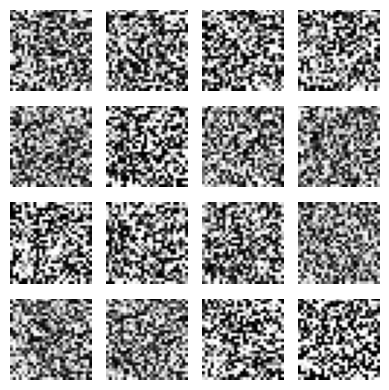

In [6]:
import matplotlib.pyplot as plt

# Generate noise input (e.g., 16 random vectors)
noise = np.random.normal(0, 1, (16, 100))

# Generate fake images
generated_images = generator.predict(noise)

# Rescale images from [-1, 1] to [0, 1] for visualization
generated_images = (generated_images + 1) / 2.0

# Plot the images
plt.figure(figsize=(4, 4))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()
